# <center><div style="width: 370px;"> ![Panel Data](pictures/Panel_Data.jpg)

# <center> Work in Titanic Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# <center> Load Data

In [4]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Check Data

In [7]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [8]:
{col: df[col].nunique() for col in df  if df[col].dtype == object}

{'sex': 2, 'embarked': 3, 'who': 3, 'embark_town': 3, 'alive': 2}

In [27]:
df = df.astype(
    {
        'sex': 'category',
        'embarked': 'category',
        'who': 'category',
        'embark_town': 'category',
        'alive': 'category'
    }
)

In [28]:
df.alive = df.alive.cat.codes
df.sex = df.sex.cat.codes

In [29]:
df.dtypes

survived          int64
pclass            int64
sex                int8
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male         bool
deck           category
embark_town    category
alive              int8
alone              bool
dtype: object

In [30]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,1,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,0,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,1,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,0,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,1,True


## Check Correlations

In [43]:
abs(df.corr()).style.background_gradient(cmap='Greens')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,0.338481,0.543351,0.077221,0.035322,0.081629,0.257307,0.557080,1.000000,0.203367
pclass,0.338481,1.000000,0.131900,0.369226,0.083081,0.018443,0.549500,0.094035,0.338481,0.135207
sex,0.543351,0.131900,1.000000,0.093254,0.114631,0.245489,0.182333,0.908578,0.543351,0.303646
age,0.077221,0.369226,0.093254,1.000000,0.308247,0.189119,0.096067,0.280328,0.077221,0.198270
sibsp,0.035322,0.083081,0.114631,0.308247,1.000000,0.414838,0.159651,0.253586,0.035322,0.584471
parch,0.081629,0.018443,0.245489,0.189119,0.414838,1.000000,0.216225,0.349943,0.081629,0.583398
fare,0.257307,0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.182024,0.257307,0.271832
adult_male,0.557080,0.094035,0.908578,0.280328,0.253586,0.349943,0.182024,1.000000,0.557080,0.404744
alive,1.000000,0.338481,0.543351,0.077221,0.035322,0.081629,0.257307,0.557080,1.000000,0.203367
alone,0.203367,0.135207,0.303646,0.198270,0.584471,0.583398,0.271832,0.404744,0.203367,1.000000


In [49]:
df.corr().style.background_gradient(cmap='Reds')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

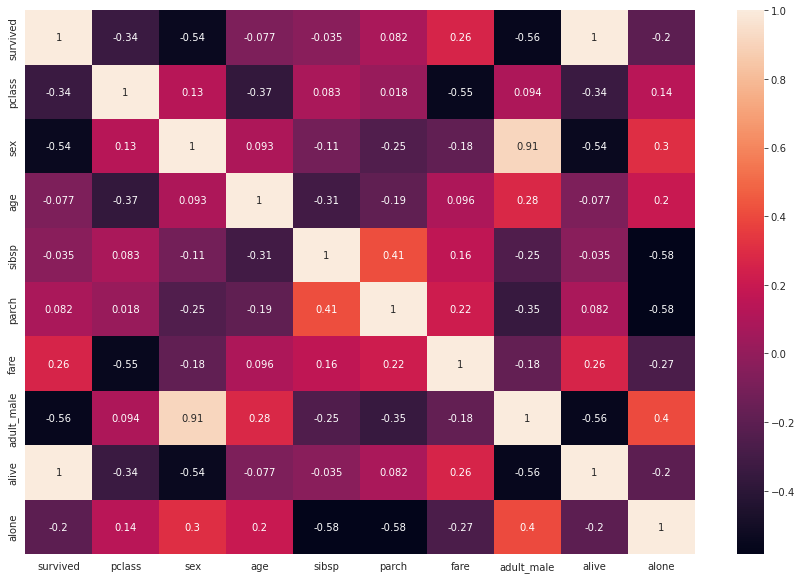

In [76]:
sns.set_style()
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 10})
plt.show()

In [ ]:
df.corr().style

# describe Data

In [82]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,alive
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [84]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [85]:
df.shape

(891, 15)